# Plotting

In this script we combine all the shapefiles in a directory into one shapefile.

In [2]:
# Load libraries
import geopandas as gpd
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

## Combine shapefile

In [3]:
# Load all shapefiles in directory and save as one shapefile
def save_combined_shapefiles(shapefile_dir, output_path, base_crs='EPSG:3857'):
    # Get all shapefile paths
    shapefile_paths = list(Path(shapefile_dir).glob("*.shp"))
    
    if not shapefile_paths:
        print(f"No shapefiles found in {shapefile_dir}")
        return None
    
    print(f"Found {len(shapefile_paths)} shapefiles")
    
    # Load shapefiles
    all_gdfs = []
    
    for shp_path in shapefile_paths:
        try:
            gdf = gpd.read_file(shp_path)
            
            # tag with filename
            filename = shp_path.stem
            gdf['source_file'] = filename
            
            # Check crs and reproject
            if gdf.crs != base_crs:
                gdf = gdf.to_crs(base_crs)
                
            all_gdfs.append(gdf)
            print(f"Loaded: {filename}")
        except Exception as e:
            print(f"Error loading {shp_path}: {e}")
    
    if not all_gdfs:
        print("No valid shapefiles loaded")
        return None
    
    # Combine all GeoDataFrames
    combined_gdf = gpd.GeoDataFrame(pd.concat(all_gdfs, ignore_index=True))
    combined_gdf.crs = base_crs
    
    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Save as single shapefile
    combined_gdf.to_file(output_path)
    print(f"Combined shapefile saved to: {output_path}")
    
    return combined_gdf

In [4]:
shapefile_dir = "outputs/outputs_1958"
output_shp = "outputs/final_shapefile/1958_combined.shp"
combined_gdf = save_combined_shapefiles(shapefile_dir, output_shp)

Found 48 shapefiles
Loaded: 58KN5144_Poly_cropped
Loaded: 58KN5441_Poly_cropped
Loaded: 58KN5545_Poly_cropped
Loaded: 58KN5143_Poly_cropped
Loaded: 58KN5040_Poly_cropped
Loaded: 58KN5138_Poly_cropped
Loaded: 58KN5445_Poly_cropped
Loaded: 58KN5044_Poly_cropped
Loaded: 58KN5244_Poly_cropped
Loaded: 58KN5643_Poly_cropped
Loaded: 58KN5242_Poly_cropped
Loaded: 58KN5041_Poly_cropped
Loaded: 58KN5444_Poly_cropped
Loaded: 58KN5038_Poly_cropped
Loaded: 58KN5443_Poly_cropped
Loaded: 58KN5544_Poly_cropped
Loaded: 58KN5043_Poly_cropped
Loaded: 58KN5239_Poly_cropped
Loaded: 58KN5137_Poly_cropped
Loaded: 58KN5243_Poly_cropped
Loaded: 58KN5141_Poly_cropped
Loaded: 58KN5237_Poly_cropped
Loaded: 58KN5039_Poly_cropped
Loaded: 58KN5241_Poly_cropped
Loaded: 58KN5446_Poly_cropped
Loaded: 58KN5142_Poly_cropped
Loaded: 58KN5344_Poly_cropped
Loaded: 58KN5542_Poly_cropped
Loaded: 58KN5343_Poly_cropped
Loaded: 58KN5136_Poly_cropped
Loaded: 58KN5238_Poly_cropped
Loaded: 58KN5543_Poly_cropped
Loaded: 58KN5341_Pol

/tmp/ipykernel_3127620/1836251470.py:44: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  combined_gdf.to_file(output_path)


Combined shapefile saved to: outputs/final_shapefile/1958_combined.shp


/Users/jcardelle/.conda/envs/ag_lab/lib/python3.9/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'source_file' to 'source_fil'
  ogr_write(


## Plot shapefile

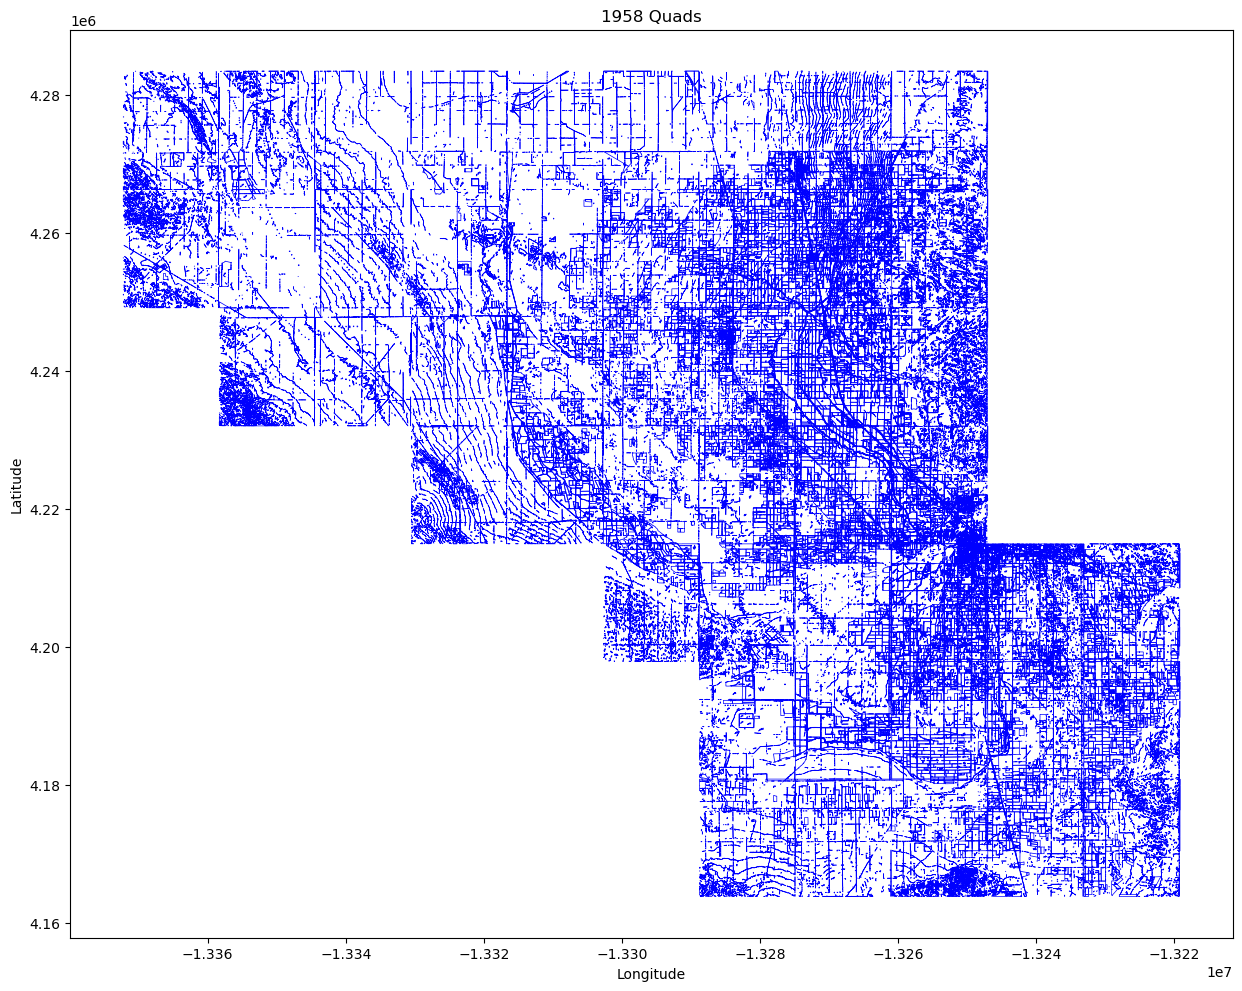

In [5]:
shapefile_path = "outputs/final_shapefile/1958_combined.shp" 
gdf = gpd.read_file(shapefile_path)
    
ax = gdf.plt(figsize=(15, 15), edgecolor='blue', facecolor='none', linewidth=0.5)
ax.set_title('1958 Quads')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()